<a href="https://colab.research.google.com/github/dany4568/FraudDetection_/blob/master/HyperParameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#authenticatiopn script in gcp
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools

!apt-get install software-properties-common

!apt-get install -y -qq software-properties-common module-init-tools

!apt-get install -y -qq python-software-properties module-init-tools

!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null

!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}





E: Package 'python-software-properties' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
software-properties-common is already the newest version (0.96.24.32.11).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.15-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.15-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.15-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.googl

In [0]:
#script for reading data from google drive
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
#important libraries in this exercise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from matplotlib.pyplot import figure

In [0]:
 data = pd.read_csv("drive//app//creditcard.csv")

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.columns
data.shape

(284807, 31)

In [23]:
#checking the number of null values as a percentage value of the dataset.
perc_nan = data.isnull().sum() * 100 / len(data)
print(perc_nan.sort_values(ascending=False))

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64


In [34]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,32127.157500,-2.866399,2.155974,-3.365360,2.519656,-1.947172,-0.530259,-3.142178,0.305583,-1.362746,-3.082687,2.101342,-3.266646,-0.050162,-3.649046,0.070357,-2.423715,-3.810404,-1.435384,0.375633,0.220299,0.384017,-0.043620,-0.043438,-0.030346,0.088697,0.018756,0.104654,0.020696,98.612425,0.500000
std,41024.089296,5.833325,3.805832,6.936495,3.156393,4.506732,1.872168,6.378120,5.326278,2.403617,4.882232,2.883931,4.953136,1.025814,4.649243,1.024045,3.637944,6.379901,2.494657,1.324899,1.127969,3.059775,1.229203,1.228641,0.584184,0.667160,0.470971,1.067754,0.462249,248.849130,0.500313
min,0.000000,-30.552380,-12.114213,-31.103685,-4.515824,-22.105532,-5.430971,-43.557242,-41.044261,-13.434066,-24.588262,-2.332011,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-1.929717,-4.781606,-1.243924,-7.263482,-2.733887,0.000000,0.000000
25%,132.000000,-3.161947,0.127486,-5.129896,0.283747,-2.201573,-1.427481,-3.625320,-0.188299,-2.365079,-5.014943,-0.166487,-6.123759,-0.740677,-6.849348,-0.451398,-4.225385,-6.258198,-2.449500,-0.498706,-0.170935,-0.181159,-0.541855,-0.240625,-0.403800,-0.218885,-0.303225,-0.043466,-0.069971,1.935000,0.000000
50%,347.500000,-0.891145,1.003803,-0.284090,1.375888,-0.477842,-0.492581,-0.429104,0.155688,-0.570541,-0.612605,1.246864,-0.514868,0.005070,-1.027809,0.164523,-0.822264,-0.505529,-0.590708,0.253523,0.037035,0.085984,-0.016522,-0.053644,0.053443,0.124755,-0.052174,0.069597,0.037173,18.000000,0.500000
75%,59456.000000,0.646310,2.936794,0.981306,4.305361,0.370124,0.248612,0.313808,0.865411,0.112141,-0.005055,3.825178,0.315594,0.674630,-0.020095,0.819826,0.133558,0.171822,0.126508,1.088146,0.435327,0.800732,0.458865,0.135223,0.398643,0.456267,0.295840,0.457194,0.219273,99.912500,1.000000
max,139816.000000,1.954852,22.057729,3.772857,12.114672,11.095089,6.474115,5.802537,20.007208,5.436633,8.737458,12.018913,2.152055,2.815440,3.442422,2.471358,2.581851,6.739384,3.531250,5.228342,11.059004,27.202839,8.361985,5.466230,1.215279,2.208209,3.065576,3.052358,1.779364,3828.040000,1.000000


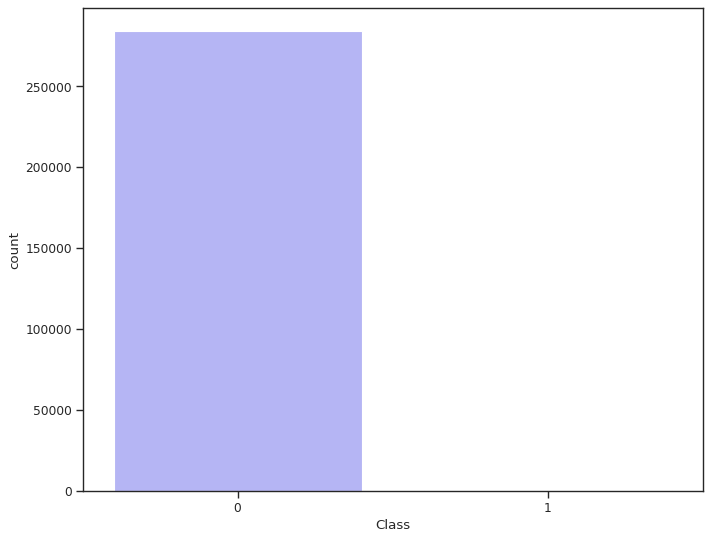

In [10]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

sns.set(style="ticks")
f = sns.countplot(x="Class", data=data, palette="bwr")
plt.show()

In [11]:
#display data with class as 1
data2 = data[data.Class == 1][0:400]
print(data2.shape)
#display data with class as 0
data3 = data[data.Class == 0][0:400]
print(data3.shape)

#append both arrays into one dataframe
data = data2.append(data3, ignore_index=True)

(400, 31)
(400, 31)


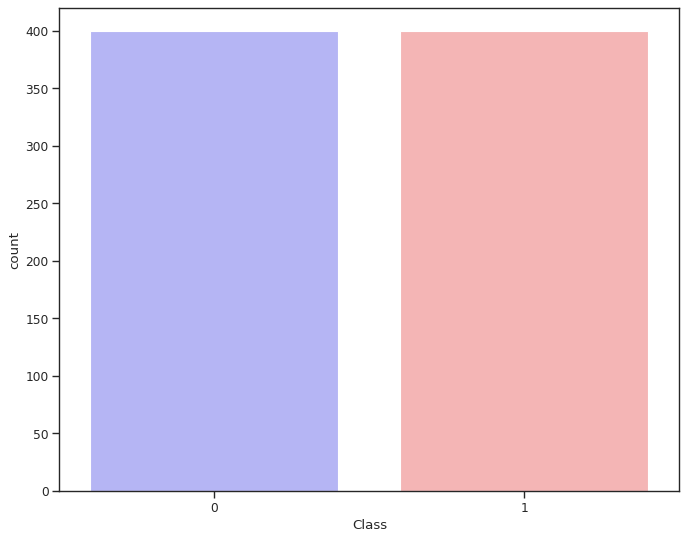

In [12]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

sns.set(style="ticks")
f = sns.countplot(x="Class", data=data, palette="bwr")
plt.show()

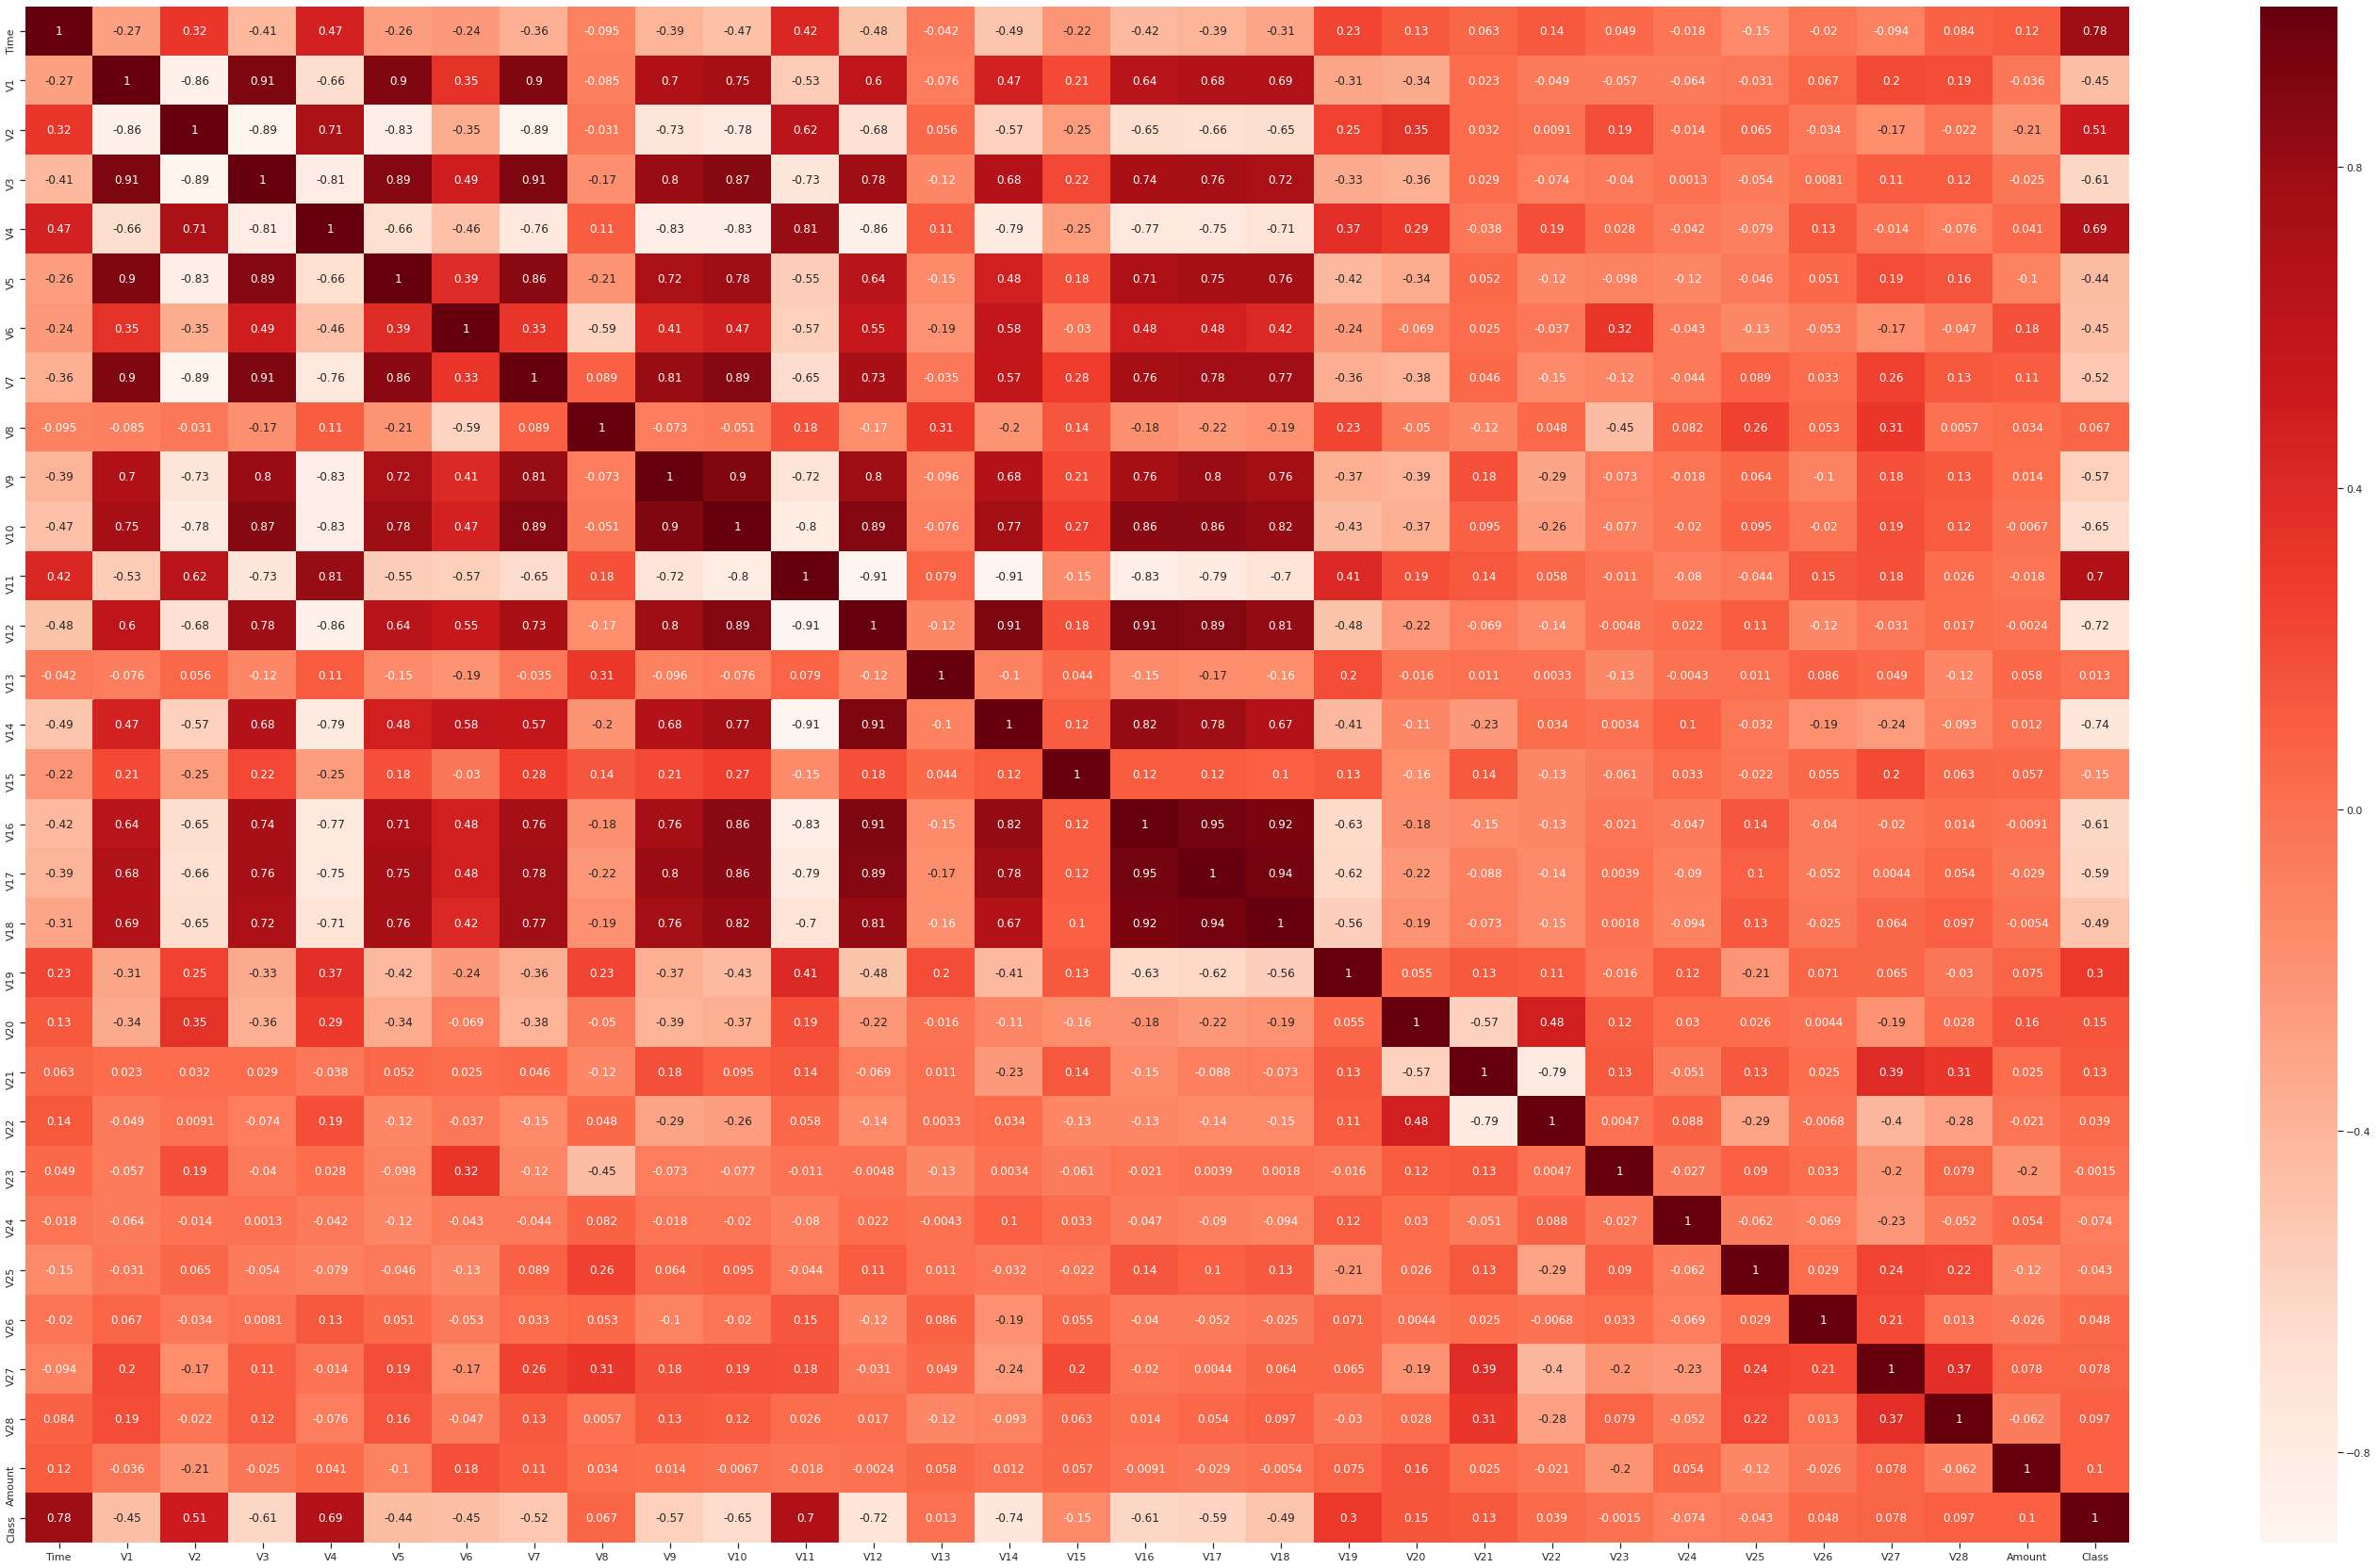

In [68]:
#feature selection using pearson correlation. values with correlation value close to +1 are positively correlated
#Using Pearson Correlation
plt.figure(figsize=(50,30))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [67]:
def feature_engine():

  #Correlation with output variable
  cor_target = abs(cor["Class"])
  #Selecting highly correlated features
  relevant_features = cor_target[cor_target>0.5]
 
  df_features = pd.DataFrame({'relevant_features': relevant_features})

  print(df_features.sort_values(ascending=False, by='relevant_features'))



feature_engine()

       relevant_features
Class           1.000000
Time            0.780221
V14             0.740831
V12             0.718771
V11             0.695844
V4              0.691738
V10             0.648052
V16             0.612190
V3              0.609996
V17             0.591004
V9              0.565969
V7              0.516577
V2              0.505883


In [60]:
def corre_():

  print(data[["V14","V12"]].corr())
  print(data[["V11","V4"]].corr())
  print(data[["V10","V16"]].corr())
  print(data[["V3","V17"]].corr())
  print(data[["V9","V7"]].corr())

  return corre_


corre_()

          V14       V12
V14  1.000000  0.907171
V12  0.907171  1.000000
          V11        V4
V11  1.000000  0.811339
V4   0.811339  1.000000
          V10       V16
V10  1.000000  0.861264
V16  0.861264  1.000000
           V3       V17
V3   1.000000  0.756578
V17  0.756578  1.000000
          V9        V7
V9  1.000000  0.812546
V7  0.812546  1.000000


<function __main__.corre_>

In [0]:
#scaling independent variables in the data and feauture engineering.

X = data[['V12', 'V17', 'V10', 'V9', 'V3']]

Y = data[['Class']]

sc = StandardScaler()

X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 101)

In [97]:
model = RandomForestClassifier(random_state = 101)
model.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [98]:
predictionForest = model.predict(X_test)


#checking accuracy as compared to initial array(Y_test)
print(confusion_matrix(Y_test, predictionForest))
print(classification_report(Y_test, predictionForest))
acc = accuracy_score(Y_test, predictionForest)
print("accuracy score is ", acc)

[[95  2]
 [ 6 97]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        97
           1       0.98      0.94      0.96       103

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

accuracy score is  0.96


In [101]:
 
model = RandomForestClassifier(n_estimators=200,max_features="log2", min_samples_leaf=20, random_state=101)
model.fit(X_train,Y_train)

predictionForest = model.predict(X_test)

print(confusion_matrix(Y_test, predictionForest))
print(classification_report(Y_test, predictionForest))
acc1 = accuracy_score(Y_test, predictionForest)

print(acc1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[[95  2]
 [10 93]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        97
           1       0.98      0.90      0.94       103

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

0.94
